Neste notebook são realizadas análises básicas em relação às estatísticas dos ativos e da carteira, como retorno normalizado e alocação. Também são calculadas métricas como risco e retorno.

In [1]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Download dos dados

In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

stocks = ['AAPL', 'TSLA', 'IBM', 'AMZN']

allocation = [.3, .2, .4, .1]

money_invested = 1000000

In [3]:
stock_df = yf.download(stocks, start = start, end = end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [4]:
stock_df

,AAPL,AMZN,IBM,TSLA
Date,,,,
2012-01-03,12.575915,179.029999,122.932228,5.616000
2012-01-04,12.643497,177.509995,122.430794,5.542000
2012-01-05,12.783865,177.610001,121.850067,5.424000
2012-01-06,12.917510,182.610001,120.451172,5.382000
2012-01-09,12.897017,178.559998,119.824280,5.450000
...,...,...,...,...
2016-12-23,27.384651,760.590027,125.206604,42.667999
2016-12-27,27.558565,771.400024,125.529549,43.905998
2016-12-28,27.441057,772.130005,124.816071,43.948002


## Retornos normalizados

In [41]:
norm_df = stock_df / stock_df.iloc[0]
norm_df

,AAPL,AMZN,IBM,TSLA
Date,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,0.991510,0.995921,0.986823
2012-01-05,1.016536,0.992068,0.991197,0.965812
2012-01-06,1.027163,1.019997,0.979818,0.958333
2012-01-09,1.025533,0.997375,0.974718,0.970442
...,...,...,...,...
2016-12-23,2.177547,4.248394,1.018501,7.597578
2016-12-27,2.191376,4.308775,1.021128,7.818019
2016-12-28,2.182033,4.312853,1.015324,7.825499


## Alocação do portfólio

In [7]:
portfolio = pd.DataFrame()
for stock, allo in zip(stocks, allocation):
    portfolio[stock] = norm_df[stock] * allo * money_invested

In [40]:
portfolio['total'] = portfolio.sum(axis=1)
portfolio

,AAPL,TSLA,IBM,AMZN,total,return
Date,,,,,,
2012-01-03,300000.000000,2.000000e+05,400000.000000,100000.000000,2.000000e+06,NaN
2012-01-04,301612.157245,1.973647e+05,398368.420278,99150.977890,1.992992e+06,-0.003504
2012-01-05,304960.664082,1.931624e+05,396478.837270,99206.837860,1.987617e+06,-0.002697
2012-01-06,308148.783295,1.916667e+05,391927.076400,101999.665897,1.987484e+06,-0.000067
2012-01-09,307659.908167,1.940883e+05,389887.279027,99737.473483,1.982746e+06,-0.002384
...,...,...,...,...,...,...
2016-12-23,653264.206647,1.519516e+06,407400.422008,424839.430286,6.010039e+06,0.010781
2016-12-27,657412.945352,1.563604e+06,408451.227467,430877.523138,6.120691e+06,0.018411
2016-12-28,654609.779186,1.565100e+06,406129.694377,431285.265122,6.114249e+06,-0.001053


<AxesSubplot:xlabel='Date'>

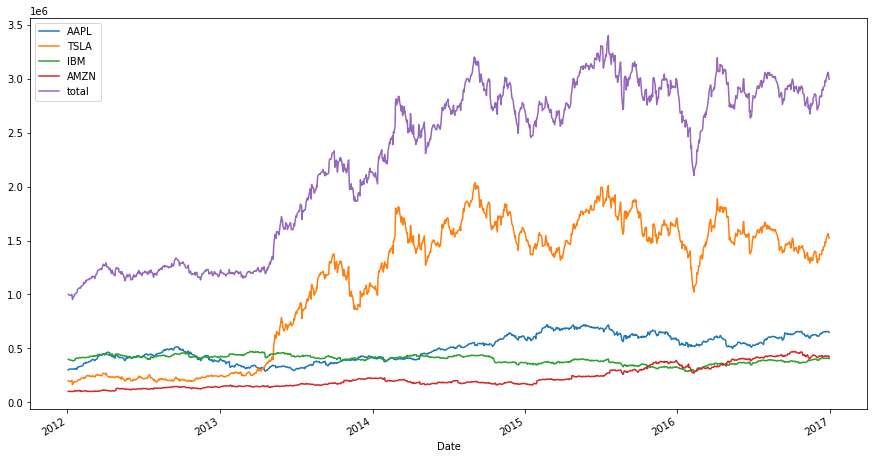

In [10]:
portfolio.plot(figsize=(15,8))

## Estatísticas do portfólio

In [39]:
portfolio['return'] = portfolio['total'].pct_change(1)
portfolio

,AAPL,TSLA,IBM,AMZN,total,return
Date,,,,,,
2012-01-03,300000.000000,2.000000e+05,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.157245,1.973647e+05,398368.420278,99150.977890,9.964962e+05,-0.003504
2012-01-05,304960.664082,1.931624e+05,396478.837270,99206.837860,9.938087e+05,-0.002697
2012-01-06,308148.783295,1.916667e+05,391927.076400,101999.665897,9.937422e+05,-0.000067
2012-01-09,307659.908167,1.940883e+05,389887.279027,99737.473483,9.913730e+05,-0.002384
...,...,...,...,...,...,...
2016-12-23,653264.206647,1.519516e+06,407400.422008,424839.430286,3.005020e+06,0.010781
2016-12-27,657412.945352,1.563604e+06,408451.227467,430877.523138,3.060346e+06,0.018411
2016-12-28,654609.779186,1.565100e+06,406129.694377,431285.265122,3.057124e+06,-0.001053


<AxesSubplot:ylabel='Frequency'>

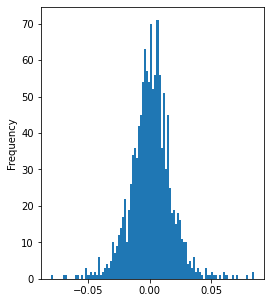

In [25]:
portfolio['return'].plot(kind='hist', bins=100, figsize=(4,5))

In [13]:
portfolio['return'].mean()

0.0010204900992736062

In [14]:
portfolio['return'].mean() * 100 * 252 # rentabilidade anual

25.71635050169488

In [15]:
portfolio['return'].std()

0.017178270346414056

## Retorno e risco

In [32]:
returns = portfolio.drop(['total','return'], axis = 1).pct_change()

In [35]:
summary = returns.describe().T.loc[:, ["mean", "std"]]
summary

,mean,std
AAPL,0.000750,0.016437
TSLA,0.002119,0.031909
IBM,0.000081,0.011756
AMZN,0.001328,0.019499


In [43]:
summary["mean"] = summary["mean"] * 252 # anual
summary["std"] = summary["std"] * np.sqrt(252) # anual
summary

,mean,std
AAPL,47.616387,4.142206
TSLA,134.574225,8.040973
IBM,5.123423,2.962477
AMZN,84.352746,4.913726


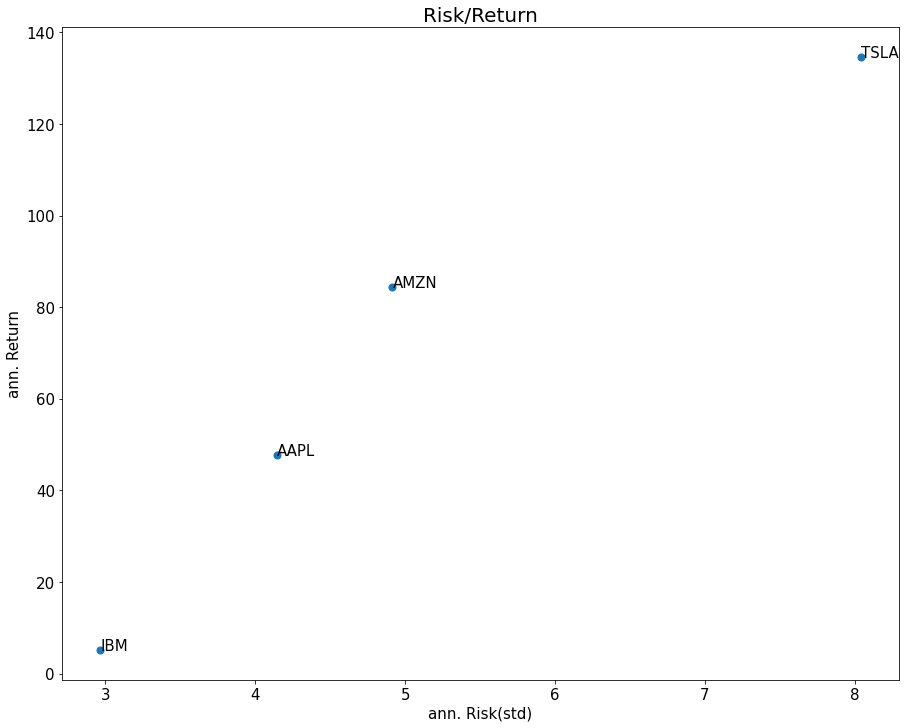

In [44]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Retorno acumulado

In [36]:
cumulative_return = 100 * (portfolio['total'][-1] / portfolio['total'][0] -1)
cumulative_return

199.58406520047524

In [19]:
portfolio['total'][-1] # retorno final

2995840.6520047523

## Correlação entre os ativos

In [48]:
returns.corr()

,AAPL,TSLA,IBM,AMZN
AAPL,1.000000,0.192847,0.297803,0.235723
TSLA,0.192847,1.000000,0.193748,0.263922
IBM,0.297803,0.193748,1.000000,0.258555
AMZN,0.235723,0.263922,0.258555,1.000000


<AxesSubplot:>

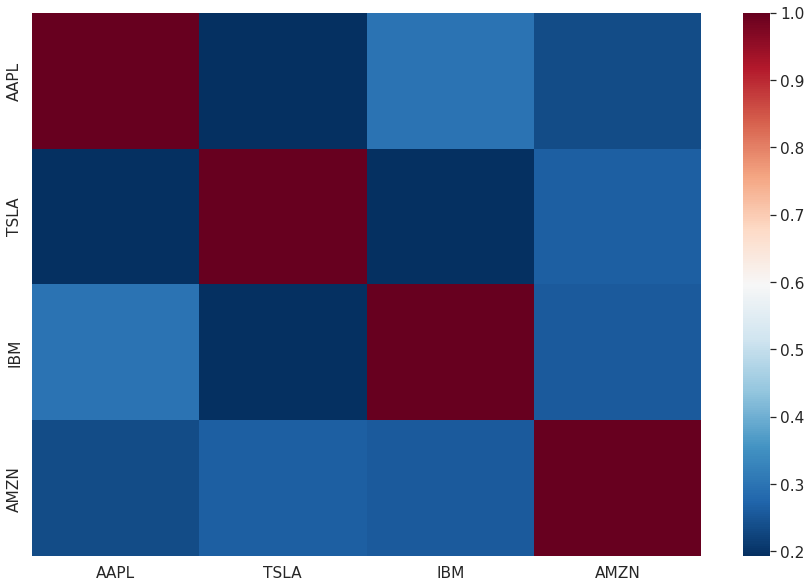

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="RdBu_r")

## Sharpe Ratio

In [38]:
risk_free_rate = 0.0 
SR = (portfolio['return'].mean() - risk_free_rate)/ portfolio['return'].std()
SR # daily

0.05940587024738683

In [37]:
ASR = (252**0.5) * SR # Sharpe Ratio anual
ASR

0.94303895455174

In [24]:
# SR > 1 -> bom
# SR > 2 -> muito bom
# SR > 3 -> excelente